# Data Pre-Processing

#### Import packages and CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

C:\Users\Dhananjana\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [18]:
df = pd.read_csv('Data/stroke_dataset.csv')

In [19]:
df.shape

(5110, 12)

In [20]:
# First 5 rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Cleaning

#### 3.1 Checking null values

In [21]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')
    

bmi 3.93346 % missing values


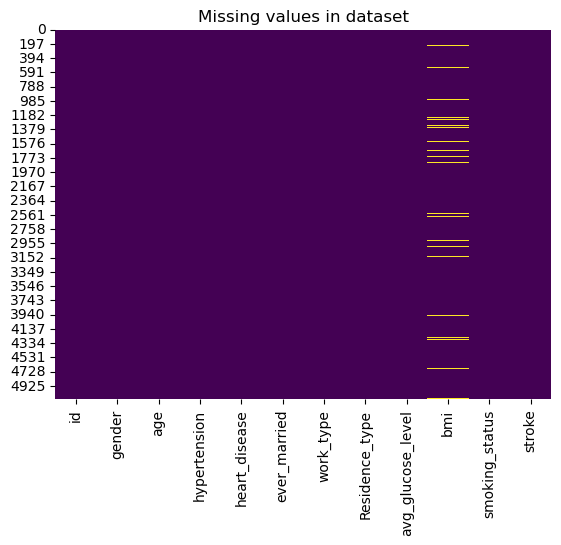

In [22]:
# Visualizing the missing values
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap='viridis' )
plt.title('Missing values in dataset')
plt.show()

#### 3.2 Other data cleaning steps

**Handling duplicates**

In [23]:
# checking for duplicates
df.duplicated().sum()

0

**Remove ID from the dataset as it cannot used in the model training**
**As the report from EDA we can drop `gender` and `Resident_type` as well**

In [24]:
df.drop(['id', 'gender',  'Residence_type'], inplace=True, axis=1)

### Feature Engineerig

#### Types of features

**Numeric Features**

In [25]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(numeric_features))
numeric_features

Number of numerical features:  6


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

**Categorical Features**

In [26]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features: ', len(categorical_features))
categorical_features

Number of categorical features:  3


['ever_married', 'work_type', 'smoking_status']

**Discrete Features**

In [29]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
print('Number of discrete features: ', len(discrete_features))
discrete_features

Number of discrete features:  3


['hypertension', 'heart_disease', 'stroke']

**Continous Features**

In [30]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Num of Continuous Features :',len(continuous_features))
continuous_features

Num of Continuous Features : 3


['age', 'avg_glucose_level', 'bmi']

#### Imputing null values to check VIF (Multi collinearity)

In [32]:
# Create copy of dataframe to check variance inflation factor
df1 = df.copy()
for i in continuous_features:
    df1[i].fillna(df1[i].median(), inplace=True)

#### Multi-collinearity check

**Variance Inflation Factor (VIF)**

<ul>
<li>Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.</li>
<li>Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).</li>
</ul>

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(considered_features, df):
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create a dataframe to store vif values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

In [36]:
compute_vif(continuous_features, df1)

,Variable,VIF
0,age,1.162810
1,avg_glucose_level,1.070325
2,bmi,1.128268


<ul>
<li>VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable</li>
<li>VIF above 5 is indicator of Multicollinearity</li>
</ul>


**This dataset doesn't have any multicollinearity**